<a href="https://colab.research.google.com/github/SyedHarshath/Computer-Vision/blob/main/Hough_Transform_Line_and_Harris_Corner_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

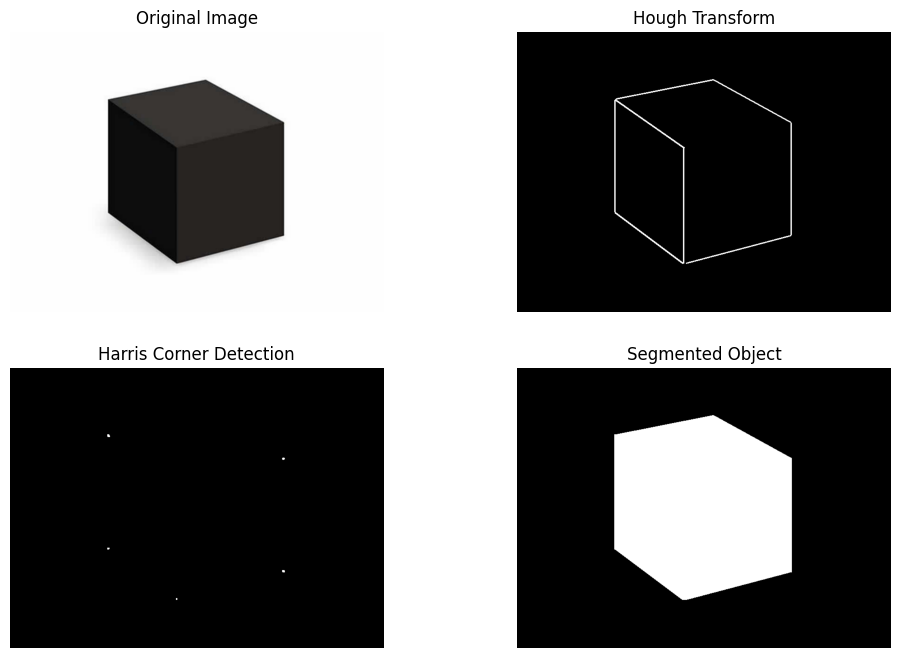

In [ ]:
def segment_cube(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    line_image = np.zeros_like(image)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 80, minLineLength=100, maxLineGap=20)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    gray_float = np.float32(gray)
    corners = cv2.cornerHarris(gray_float, blockSize=3, ksize=5, k=0.04)
    corners = cv2.dilate(corners, None)
    corner_image = np.zeros_like(image)
    corner_image[corners > 0.02 * corners.max()] = [255, 255, 255]
    segmentation_mask = cv2.bitwise_or(line_image, corner_image)
    segmentation_mask = cv2.cvtColor(segmentation_mask, cv2.COLOR_BGR2GRAY)
    kernel = np.ones((5,5), np.uint8)
    segmentation_mask = cv2.morphologyEx(segmentation_mask, cv2.MORPH_CLOSE, kernel)
    contours, _ = cv2.findContours(segmentation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    object_mask = np.zeros_like(gray)

    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(object_mask, [largest_contour], -1, 255, thickness=cv2.FILLED)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
    plt.title("Hough Transform")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
    plt.title("Harris Corner Detection")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.imshow(object_mask, cmap='gray')
    plt.title("Segmented Object")
    plt.axis("off")
    plt.show()

segment_cube("blackbox2.jpg")

### IMAGE 2

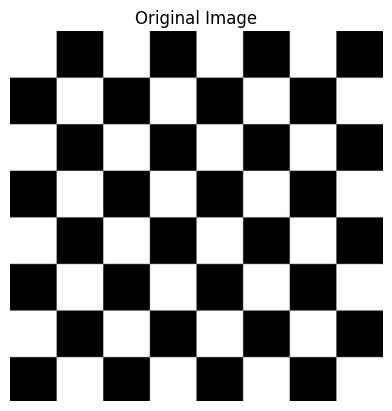

In [ ]:
image = cv2.imread("chess.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

### Hough Line Detection

In [ ]:
blurred = cv2.GaussianBlur(image_gray, (5,5), 0)
edges = cv2.Canny(blurred, 30, 100)

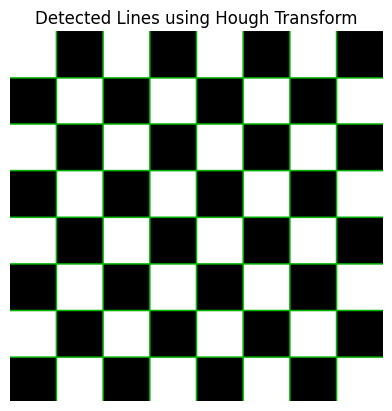

In [ ]:
def filter_lines(lines, rho_threshold=20, theta_threshold=3 * np.pi/180):

    filtered = []
    if lines is not None:
        for rho, theta in sorted(lines[:, 0], key=lambda x: (x[1], x[0])):
            if all(abs(rho - r) > rho_threshold or abs(theta - t) > theta_threshold for r, t in filtered):
                filtered.append((rho, theta))

    return np.array(filtered).reshape(-1, 1, 2) if filtered else None

lines = cv2.HoughLines(edges, 1, np.pi / 180, 80) # Lower threshold to detect missing lines
if lines is not None:
    lines = filter_lines(lines)

line_image = image.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 180, 0), 2)

plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Lines using Hough Transform")
plt.axis('off')
plt.show()

### Harris Corner Detection

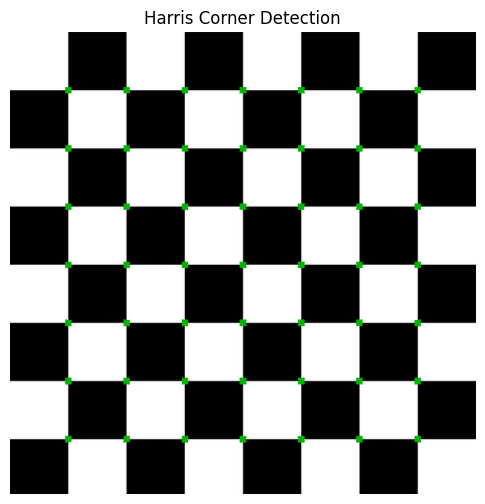

In [ ]:
gray = np.float32(image_gray)
corners = cv2.cornerHarris(gray, blockSize=5, ksize=7, k=0.04)
corners = cv2.dilate(corners, None)
image[corners > 0.01 * corners.max()] = [0, 180, 0]
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis("off")
plt.show()